In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('/Users/macbookair/Downloads/lagos_all_years.csv')
print('Data successfully read!')

Data successfully read!


In [3]:
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,0.0,...,NaN,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,0.0,...,NaN,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,0.0,...,NaN,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
3,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,0.0,...,NaN,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,0.0,...,NaN,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [4]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [7]:
df.head()


,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin,day,month,year
0,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,0.0,...,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,1.0,1.0,2002.0
1,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,0.0,...,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,2.0,1.0,2002.0
2,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,0.0,...,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,3.0,1.0,2002.0
3,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,0.0,...,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,4.0,1.0,2002.0
4,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,0.0,...,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,5.0,1.0,2002.0


In [8]:
df.shape

(8676, 37)

In [9]:
df.isnull().sum()

datetime            1551
tempmax              591
tempmin              591
temp                 823
feelslikemax         591
feelslikemin         591
feelslike            823
dew                  823
humidity             823
precip               823
precipprob           823
precipcover            0
preciptype          4940
snow                4748
snowdepth           4753
windgust            2800
windspeed            598
winddir             1206
sealevelpressure    1012
cloudcover           823
visibility          1025
solarradiation      3288
solarenergy         3288
uvindex             3288
severerisk          7314
sunrise              366
sunset               366
moonphase            366
conditions          1179
description         1179
icon                1179
stations            1179
windspeedmax        8310
windspeedmin        8310
day                 1551
month               1551
year                1551
dtype: int64

In [10]:
# Heavy Rainfall threshold (50.mm a day)
heavy_rainfall_threshold = 50.0

#Filter data to find days with precipitation above threshold
df = df[df['precip'] > heavy_rainfall_threshold].reset_index()

df.head()

,index,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin,day,month,year
0,156,2002-06-06,28.1,21.1,23.8,32.8,21.1,24.4,23.0,95.5,...,0.85,"Rain, Partially cloudy",Clearing in the afternoon with rain clearing l...,rain,65201099999,NaN,NaN,6.0,6.0,2002.0
1,160,2002-06-10,30.1,23.1,25.6,36.5,23.1,26.6,24.5,93.7,...,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,65201099999,NaN,NaN,10.0,6.0,2002.0
2,174,2002-06-24,26.1,23.4,25.1,26.1,23.4,25.1,24.7,97.7,...,0.50,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,65201099999,NaN,NaN,24.0,6.0,2002.0
3,192,2002-07-12,29.1,22.6,25.9,33.7,22.6,27.2,24.2,90.5,...,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,65201099999,NaN,NaN,12.0,7.0,2002.0
4,196,2002-07-16,25.6,24.1,25.0,25.6,24.1,25.0,24.6,97.7,...,0.22,"Rain, Partially cloudy",Becoming cloudy in the afternoon with rain.,rain,65201099999,NaN,NaN,16.0,7.0,2002.0


In [11]:
df.shape

(175, 38)

In [12]:
df.drop('index', axis=1, inplace=True)

In [13]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin', 'day', 'month', 'year'],
      dtype='object')

In [14]:
# viz_df = df[['datetime', 'tempmax', 'tempmin', 'temp','precip', 'precipprob',
#        'precipcover', 'preciptype', 'moonphase', 'conditions', 'description', 'icon', 'day', 'month', 'year']]

In [15]:
sorted_df = df.copy()

In [16]:
df.isnull().sum()

datetime             32
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype            0
snow                 90
snowdepth            91
windgust             45
windspeed            13
winddir              14
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation       64
solarenergy          64
uvindex              64
severerisk          141
sunrise              13
sunset               13
moonphase            13
conditions           13
description          13
icon                 13
stations             13
windspeedmax        162
windspeedmin        162
day                  32
month                32
year                 32
dtype: int64

In [17]:
#Checking the year range in the dataset

df['year'].unique()

array([2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012.,   nan, 2014., 2015., 2016., 2017., 2018., 2020.,
       2021., 2023., 2024.])

In [18]:

df.shape

(175, 37)

In [19]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin', 'day', 'month', 'year'],
      dtype='object')

In [20]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [21]:
#checking if there is still some missing data

df.isnull().sum()

datetime            32
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
severerisk           0
sunrise             13
sunset              13
moonphase            0
conditions          13
description         13
icon                13
stations            13
windspeedmax         0
windspeedmin         0
day                  0
month                0
year                 0
dtype: int64

In [22]:
df[['day', 'month','year']] = df[['day', 'month','year']].astype(int)

In [23]:
# Saving the filtered flood data file
# df.to_csv('/Users/macbookair/Documents/sorted_lagos_flood.csv')

In [24]:
prem = df.groupby('year')['precip'].mean().reset_index()

In [25]:
fig = px.line(prem, x='year', y='precip',
              title='Average Yearly Precipitation (mm)')
fig.update_layout(xaxis_title='Year',  yaxis_title='Precipitation (mm)', width=1000, height=700)
fig.show()

from the graph, we can observe that year 2005 has the highest average precipitation of 177.67, and 2011 with 145.8. There was flood in those two years

In [26]:
df.year.unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2014, 2015, 2016, 2017, 2018, 2020, 2021, 2023, 2024])

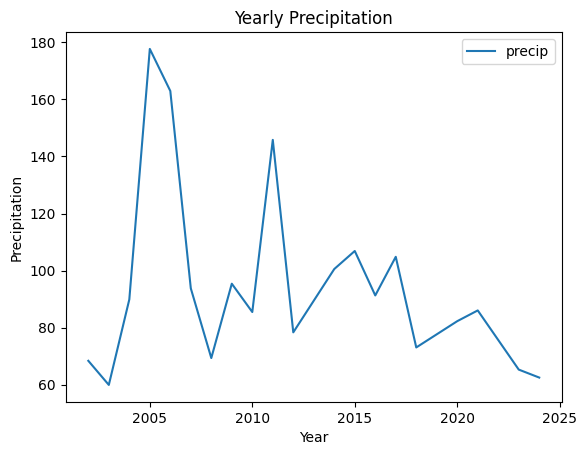

In [27]:
prem.plot(kind='line', x='year', y='precip')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Yearly Precipitation')
plt.show()

In [28]:
df.isnull().sum()

datetime            32
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
severerisk           0
sunrise             13
sunset              13
moonphase            0
conditions          13
description         13
icon                13
stations            13
windspeedmax         0
windspeedmin         0
day                  0
month                0
year                 0
dtype: int64

In [29]:
df.year.unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2014, 2015, 2016, 2017, 2018, 2020, 2021, 2023, 2024])

In [30]:
dape= df.groupby('day')['precip'].mean().reset_index()

<Axes: xlabel='day'>

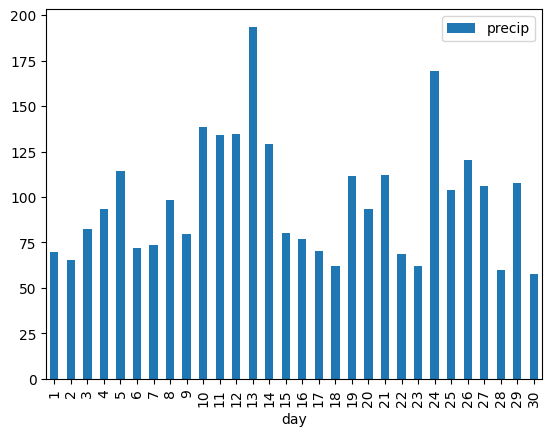

In [31]:
dape.plot(kind='bar', x='day', y='precip')

We can see that on the 11th of the month there are higher chance of flood

In [32]:
mopr = df.groupby('month')['precip'].mean().reset_index()

In [33]:
fig = px.bar(mopr, x='month', y='precip',
             title='Monthly Average Percipitation',
             labels={'month':'Month of the Year', 'precip':'Average Precipitation (mm)'})
fig.update_layout(xaxis_title ='Month', yaxis_title='Precipitation (mm)')
fig.show()

In [34]:
#Average Precipitation for each day of the year

avg_dape = df.groupby('day')['precip'].mean().reset_index()



In [35]:
fig = px.line(avg_dape, x='day', y='precip',
              title='Average Daily Precipitation in Lagos',
              labels={'day':'Day of the Year', 'precip':'Average Precipitation (mm)'})

fig.update_layout(xaxis_title='Day', yaxis_title='Average Precipitation (mm)')
fig.show()

The Average Daily Precipitation has high rate on the 13th and 24th which is likely to flood. 

In [36]:
avg_moonp = df.groupby('moonphase')['precip'].mean().reset_index()

In [37]:
avg_moonp.head()

,moonphase,precip
0,0.00,141.766667
1,0.02,145.000000
2,0.03,165.500000
3,0.05,56.250000
4,0.07,72.100000


In [38]:
fig= px.line(avg_moonp, x='moonphase', y='precip',
             title='Average Moonphase in Lagos')
fig.update_layout(xaxis_title='moonphase', yaxis_title='Average Precipitation (mm)')
fig.show()

The highest moonphase is at 0.79 with an avaerage precipitation of 299

In [39]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin', 'day', 'month', 'year'],
      dtype='object')

In [40]:
df['conditions'].head()

0    Rain, Partially cloudy
1    Rain, Partially cloudy
2            Rain, Overcast
3    Rain, Partially cloudy
4    Rain, Partially cloudy
Name: conditions, dtype: object

In [41]:
# Encode categorical variables (conditions and description) using Label Encoding

label_encoder = LabelEncoder()

df['condition_encoded'] = label_encoder.fit_transform(df['conditions'].astype(str))
df['description_encoded'] = label_encoder.fit_transform(df['description'].astype(str))

# Feature Engineering: Creating a target variable 'flood' based on high precipitation days 
df['flood'] = df['precip'] > heavy_rainfall_threshold

#Seelecting features for the model
features = ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipprob', 'precipcover', 'condition_encoded', 'description_encoded', 'windspeed', 'sealevelpressure','month', 'day']

X =df[features]
Y = df['flood']


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Initial and train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

# Evaluate the model
classification_rep = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)


classification_rep, conf_matrix

('              precision    recall  f1-score   support\n\n        True       1.00      1.00      1.00        35\n\n    accuracy                           1.00        35\n   macro avg       1.00      1.00      1.00        35\nweighted avg       1.00      1.00      1.00        35\n',
 array([[35]]))

In [42]:
from datetime import timedelta


In [43]:
# Predict the next flood date
last_date = df['datetime'].iloc[-1]
next_flood_date = None

for i in range(1, 365):  # Check the next 365 days (1 year)
    future_date = last_date + timedelta(days=i)
    future_data = {
        'tempmax': df['tempmax'].mean(),  # Use mean values of the features
        'tempmin': df['tempmin'].mean(),
        'temp': df['temp'].mean(),
        'humidity': df['humidity'].mean(),
        'precip': df['precip'].mean(),
        'precipprob': df['precipprob'].mean(),
        'precipcover': df['precipcover'].mean(),
        'condition_encoded': df['condition_encoded'].mode()[0],  # Use mode for categorical data
        'description_encoded': df['description_encoded'].mode()[0],
        'windspeed': df['windspeed'].mean(),
        'sealevelpressure': df['sealevelpressure'].mean(),
        'month': future_date.month,
        'day': future_date.day
    }
    future_df = pd.DataFrame([future_data])
    future_pred = rf_model.predict(future_df)[0]
    if future_pred == 1 and future_date > pd.Timestamp.today():
        next_flood_date = future_date
        break

if next_flood_date:
    print(f"The next predicted flood date in lagos is {next_flood_date.strftime('%Y-%m-%d')}")
else:
    print("No flood predicted in the next year.")

The next predicted flood date in lagos is 2024-07-09
